## Assignment #3 . See below for instructions.

1. Go to the site here: https://psl.noaa.gov/data/climateindices/list/ and pick a climate index. You can use pandas or numpy to read in the data. Remember to read the documentation for it!

2. Using your data, build a composite map for the relevant "phases" or conditions (positive, negative, neutral) for your index.

3. Plot the differences against neutral conditions. If your index doesn't have a neutral condition, make a comparison between positive and negative phases in your index.

4. Use an appropriate statistical test for your data and mark the regions in your differences map where the differences are statistically significant using stippling, hatching, or transparency.

In [2]:
# Import necessary libraries and modules
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data: 
- https://psl.noaa.gov/data/climateindices/list/



In [3]:
file_nino34 = r'C:\Github\Lab_work\CLIM680\Data\nino34_1982-2019.oisstv2_anoms.nc'
ds_nino34 = xr.open_dataset(file_nino34)
print(ds_nino34)

<xarray.Dataset> Size: 9kB
Dimensions:  (time: 456)
Coordinates:
  * time     (time) datetime64[ns] 4kB 1982-01-01 1982-02-01 ... 2019-12-01
    month    (time) int64 4kB ...
Data variables:
    sst      (time) float32 2kB ...


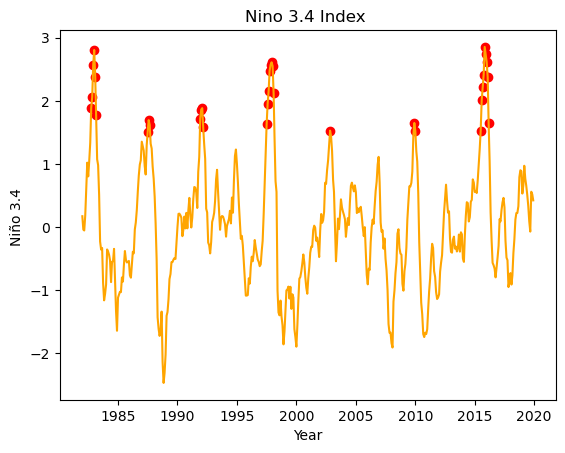

In [41]:
plt.plot(ds_nino34['time'], ds_nino34['sst'], color='orange')   # Plot the SST anomaly
plt.scatter(peaks['time'], peaks, color='red')  # Plot the peaks
plt.xlabel('Year') 
plt.ylabel('Niño 3.4 ')
plt.title('Nino 3.4 Index ')
plt.show()  # Show the plot

El Nino:  61
Neutral:  330
La Nina:  65
[array(61), array(65), array(330)]


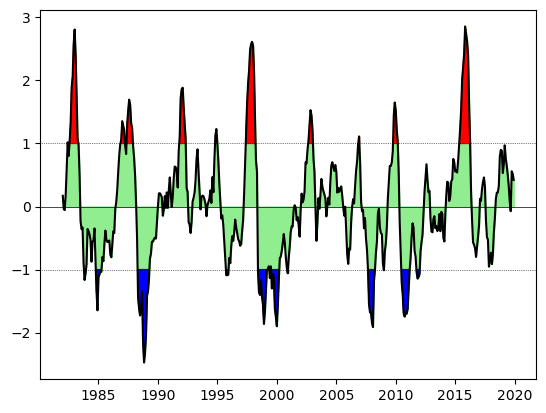

In [5]:
elnino=ds_nino34['sst'].where(ds_nino34['sst']>=1)
lanina=ds_nino34['sst'].where(ds_nino34['sst']<=-1)
neutral=ds_nino34['sst'].where(np.logical_and(ds_nino34['sst']>-1,
                                              ds_nino34['sst']<1))

print('El Nino: ',elnino.count(dim='time').values)
print('Neutral: ',neutral.count(dim='time').values)
print('La Nina: ',lanina.count(dim='time').values)

counts=[elnino.count(dim='time').values,
        lanina.count(dim='time').values,
        neutral.count(dim='time').values]
print(counts)

plt.plot(ds_nino34['time'],ds_nino34['sst'],'k')
plt.fill_between(ds_nino34['time'].values,ds_nino34['sst'],color='lightgreen')
plt.fill_between(ds_nino34['time'].values,elnino,y2=1.0,color='red')
plt.fill_between(ds_nino34['time'].values,lanina,y2=-1.0,color='blue')
plt.axhline(0,color='black',linewidth=0.5)
plt.axhline(1,color='black',linewidth=0.5,linestyle='dotted')
plt.axhline(-1,color='black',linewidth=0.5,linestyle='dotted') ;

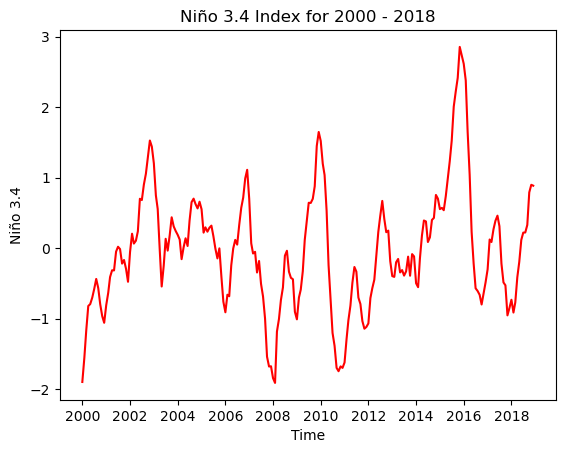

In [44]:
# El Nino, La Nina, and Neutral conditions for 2000 to 2018
# Filter the dataset for 2000 to 2018
ds_nino2018 = ds_nino34.sel(time=slice('2000-01-01', '2018-12-31'))

# Plotting the data 2000 to 2018
plt.plot(ds_nino2018['time'], ds_nino2018['sst'], color = 'red')

plt.title('Niño 3.4 Index for 2000 - 2018')
plt.xlabel('Time')
plt.ylabel('Niño 3.4')
plt.show()

El Nino:  53
Neutral:  110
La Nina:  65
[array(53), array(65), array(110)]


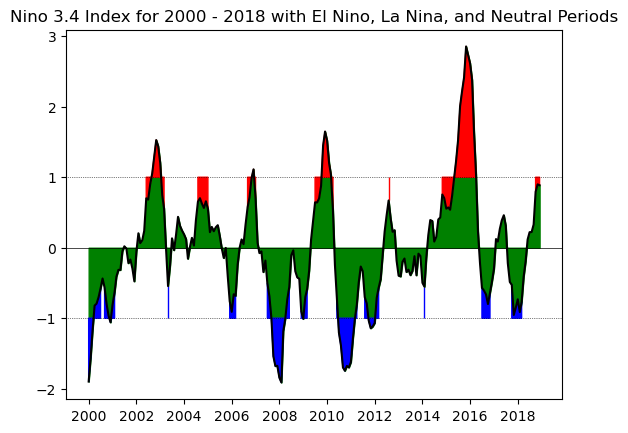

In [45]:
#El nino, la nina, neutral for 2000 to 2018

"""
El nino, la nina, neutral for 2000 to 2018
This script analyzes sea surface temperature (SST) data to classify periods as El Nino, La Nina, or Neutral from the year 2000 to 2018. It performs the following tasks:
1. Classifies SST data into El Nino, La Nina, and Neutral categories based on temperature thresholds.
2. Counts the number of time points in each category.
3. Plots the SST data over time, highlighting El Nino, La Nina, and Neutral periods with different colors.
Variables:
- elnino: SST data points classified as El Nino (SST >= 0.5).
- lanina: SST data points classified as La Nina (SST <= -0.5).
- neutral: SST data points classified as Neutral (-0.5 < SST < 0.5).
- counts: List containing the counts of time points in El Nino, La Nina, and Neutral categories.
Plot:
- The SST data is plotted over time with different colors indicating El Nino (red), La Nina (blue), and Neutral (green) periods.
- Horizontal lines at SST values of 0, 1, and -1 are added for reference.
"""
plt.title('Nino 3.4 Index for 2000 - 2018 with El Nino, La Nina, and Neutral Periods')
elnino = ds_nino2018['sst'].where(ds_nino2018['sst'] >= 0.5)
lanina = ds_nino2018['sst'].where(ds_nino2018['sst'] <= -0.5)
neutral = ds_nino2018['sst'].where(np.logical_and(ds_nino2018['sst'] > -0.5, ds_nino2018['sst'] < 0.5))

print('El Nino: ', elnino.count(dim='time').values)
print('Neutral: ', neutral.count(dim='time').values)
print('La Nina: ', lanina.count(dim='time').values)

counts = [elnino.count(dim='time').values, lanina.count(dim='time').values, neutral.count(dim='time').values]
print(counts)

plt.plot(ds_nino2018['time'], ds_nino2018['sst'], 'k')
plt.fill_between(ds_nino2018['time'].values, ds_nino2018['sst'], color='green')
plt.fill_between(ds_nino2018['time'].values, elnino, y2=1.0, color='red')
plt.fill_between(ds_nino2018['time'].values, lanina, y2=-1.0, color='blue')
plt.axhline(0, color='black', linewidth=0.5)
plt.axhline(1, color='black', linewidth=0.5, linestyle='dotted')
plt.axhline(-1, color='black', linewidth=0.5, linestyle='dotted')
plt.show()

In [8]:
print (ds_nino2018)

<xarray.Dataset> Size: 5kB
Dimensions:  (time: 228)
Coordinates:
  * time     (time) datetime64[ns] 2kB 2000-01-01 2000-02-01 ... 2018-12-01
    month    (time) int64 2kB ...
Data variables:
    sst      (time) float32 912B -1.898 -1.555 -1.169 ... 0.7911 0.8992 0.8865


## Data: Precipitation GPCP
Date: 	1979-01-01 00:00:00 UTC - 2021-12-01 00:00:00 UTC
 - https://psl.noaa.gov/repository/entry/show?entryid=9aaab85c-cdd3-44af-810c-12a1b23ccf5d


In [9]:
file= r'C:\Github\Lab_work\CLIM680\Data\GPCP_NOAA_precip.mon.mean.nc'
ds_precip=xr.open_dataset(file)
ds_precip

<xarray.Dataset> Size: 23MB
Dimensions:    (lat: 72, lon: 144, time: 550, nv: 2)
Coordinates:
  * lat        (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon        (lon) float32 576B 1.25 3.75 6.25 8.75 ... 353.8 356.2 358.8
  * time       (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2024-10-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] 9kB ...
    lat_bnds   (lat, nv) float32 576B ...
    lon_bnds   (lon, nv) float32 1kB ...
    precip     (time, lat, lon) float32 23MB ...
Attributes: (12/18)
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    ...                    ...
    source:                https://www.ncei.noaa.gov/data/global-precipitatio...
    source_documentation:  https://www.ncdc.noaa.gov/cdr/atmospheric/precipit...
    NCO:                   4.6.9
    history:               Generated at NOAA/ESRL PSD Sep 9 2016 based on dat...
    References:            http://www.psl.noaa.gov/data/gridded/data.gpcp.html
    data_comment:          Interim data covers 2024/09 through latest.

In [10]:
print(ds_precip['time'].dtype)
print(ds_precip['time'])


datetime64[ns]
<xarray.DataArray 'time' (time: 550)> Size: 4kB
array(['1979-01-01T00:00:00.000000000', '1979-02-01T00:00:00.000000000',
       '1979-03-01T00:00:00.000000000', ..., '2024-08-01T00:00:00.000000000',
       '2024-09-01T00:00:00.000000000', '2024-10-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2024-10-01
Attributes:
    long_name:      Time
    delta_t:        0000-01-00 00:00:00
    avg_period:     0000-01-00 00:00:00
    standard_name:  time
    axis:           T
    actual_range:   [65378. 82088.]


In [11]:
# Align precipitation data with Nino34 time period
ds_precip = ds_precip.sel(time=slice(ds_nino34['time'][0], ds_nino34['time'][-1]))
ds_precip


<xarray.Dataset> Size: 19MB
Dimensions:    (lat: 72, lon: 144, time: 456, nv: 2)
Coordinates:
  * lat        (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon        (lon) float32 576B 1.25 3.75 6.25 8.75 ... 353.8 356.2 358.8
  * time       (time) datetime64[ns] 4kB 1982-01-01 1982-02-01 ... 2019-12-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] 7kB ...
    lat_bnds   (lat, nv) float32 576B ...
    lon_bnds   (lon, nv) float32 1kB ...
    precip     (time, lat, lon) float32 19MB ...
Attributes: (12/18)
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    ...                    ...
    source:                https://www.ncei.noaa.gov/data/global-precipitatio...
    source_documentation:  https://www.ncdc.noaa.gov/cdr/atmospheric/precipit...
    NCO:                   4.6.9
    history:               Generated at NOAA/ESRL PSD Sep 9 2016 based on dat...
    References:            http://www.psl.noaa.gov/data/gridded/data.gpcp.html
    data_comment:          Interim data covers 2024/09 through latest.

In [12]:
#Create a climatology and anomalies
ds_climo=ds_precip.groupby('time.month').mean()
ds_anoms=ds_precip.groupby('time.month')-ds_climo
ds_anoms

<xarray.Dataset> Size: 20MB
Dimensions:   (lat: 72, lon: 144, time: 456, nv: 2)
Coordinates:
  * lat       (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon       (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time      (time) datetime64[ns] 4kB 1982-01-01 1982-02-01 ... 2019-12-01
    month     (time) int64 4kB 1 2 3 4 5 6 7 8 9 10 ... 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nv
Data variables:
    lat_bnds  (time, lat, nv) float32 263kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    lon_bnds  (time, lon, nv) float32 525kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    precip    (time, lat, lon) float32 19MB 0.01126 0.02892 ... -0.2725 -0.2236

In [13]:
"""
This code calculates the mean precipitation anomalies for El Niño, La Niña, and neutral conditions from a dataset.
Variables:
    elnino_precip (xarray.DataArray): Mean precipitation anomalies during El Niño periods.
    lanina_precip (xarray.DataArray): Mean precipitation anomalies during La Niña periods.
    neutral_precip (xarray.DataArray): Mean precipitation anomalies during neutral periods.
    comp_precip (list): List containing mean precipitation anomalies for El Niño, La Niña, and neutral conditions.
Steps:
1. Selects the time periods corresponding to El Niño, La Niña, and neutral conditions from the dataset `ds_anoms`.
2. Calculates the mean precipitation anomalies for each condition.
3. Stores the results in a list `comp_precip`.
4. Prints the list `comp_precip`.
"""
elnino_precip=ds_anoms.sel(time=elnino.dropna(dim='time')['time']).mean(dim='time')
lanina_precip=ds_anoms.sel(time=lanina.dropna(dim='time')['time']).mean(dim='time')
neutral_precip=ds_anoms.sel(time=neutral.dropna(dim='time')['time']).mean(dim='time')

comp_precip=[elnino_precip,lanina_precip,neutral_precip]
print(comp_precip)

[<xarray.Dataset> Size: 44kB
Dimensions:   (lat: 72, lon: 144, nv: 2)
Coordinates:
  * lat       (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon       (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Dimensions without coordinates: nv
Data variables:
    lat_bnds  (lat, nv) float32 576B 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    lon_bnds  (lon, nv) float32 1kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    precip    (lat, lon) float32 41kB -0.04966 -0.05648 ... 0.08038 0.04682, <xarray.Dataset> Size: 44kB
Dimensions:   (lat: 72, lon: 144, nv: 2)
Coordinates:
  * lat       (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon       (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Dimensions without coordinates: nv
Data variables:
    lat_bnds  (lat, nv) float32 576B 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    lon_bnds  (lon, nv) float32 1kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    precip    (lat, 

Text(0.5, 0.98, 'Composite Precipitation Anomalies during ENSO 2000-2018')

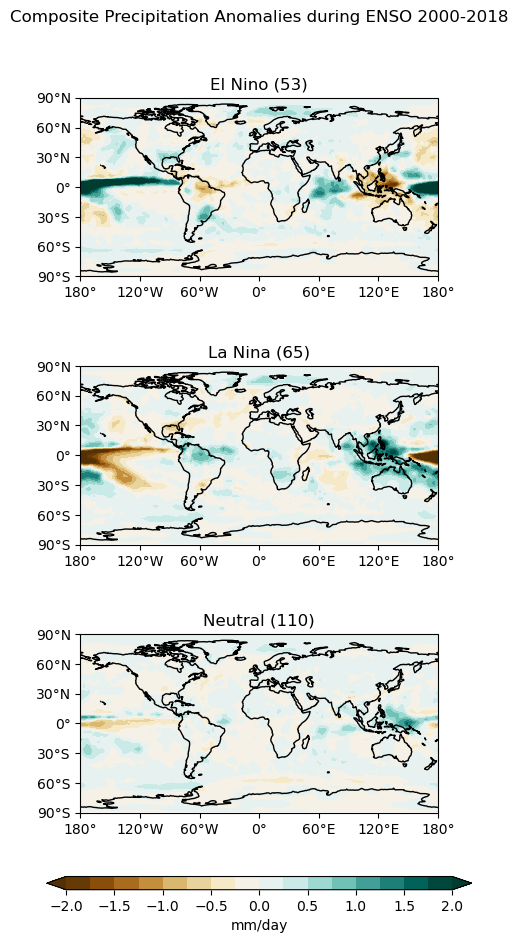

In [14]:
labels=['El Nino','La Nina', 'Neutral']
clevs = np.arange(-2.0,2.1,0.25)

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=3,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array (just 3 rows)
axs = axs.flatten()

# Loop over all of the ENSO phases and plot
for i, enso in enumerate(comp_precip):

    # Select the data as a DataArray, if it's in a Dataset
    data = enso.precip if isinstance(enso, xr.Dataset) else enso

    # Add the cyclic point
    data, lons = add_cyclic_point(data, coord=data['lon'])

    # Contour plot
    #cs = axs[i].contourf(lons, data['lat'], data, clevs,
    cs = axs[i].contourf(lons, comp_precip[i]['lat'], data.filled(np.nan), clevs,
                         transform=ccrs.PlateCarree(),
                         cmap='BrBG', extend='both')

        
    # Longitude labels
    axs[i].set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)

    # Latitude labels
    axs[i].set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    axs[i].yaxis.set_major_formatter(lat_formatter)

    # Title each subplot with the name of the season
    axs[i].set_title(labels[i] + ' (' + str(counts[i]) + ')')

    # Draw the coastlines for each subplot
    axs[i].coastlines()

# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.012])

# Draw the colorbar
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='mm/day')

# Add a big title at the top
plt.suptitle('Composite Precipitation Anomalies during ENSO 2000-2018')

In [15]:
# Loop over each precipitation anomaly dataset in comp_precip
for i, enso in enumerate(comp_precip):
    # If enso is a Dataset, extract the 'precip' DataArray
    if isinstance(enso, xr.Dataset):
        data = enso['precip']
    else:
        data = enso

    # Check the min and max values of the data
    print(f"Phase {labels[i]} - Min: {np.nanmin(data)} | Max: {np.nanmax(data)}")


Phase El Nino - Min: -2.11507511138916 | Max: 4.704726696014404
Phase La Nina - Min: -3.675600051879883 | Max: 2.535125255584717
Phase Neutral - Min: -1.6465113162994385 | Max: 1.526543378829956


In [ ]:
## calculate differences
diff_precip=[elnino_precip-neutral_precip, 
             lanina_precip-neutral_precip]
diff_precip

[<xarray.Dataset> Size: 44kB
 Dimensions:   (lat: 72, lon: 144, nv: 2)
 Coordinates:
   * lat       (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
   * lon       (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
 Dimensions without coordinates: nv
 Data variables:
     lat_bnds  (lat, nv) float32 576B 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
     lon_bnds  (lon, nv) float32 1kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
     precip    (lat, lon) float32 41kB -0.03445 -0.04893 ... 0.07896 0.03959,
 <xarray.Dataset> Size: 44kB
 Dimensions:   (lat: 72, lon: 144, nv: 2)
 Coordinates:
   * lat       (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
   * lon       (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
 Dimensions without coordinates: nv
 Data variables:
     lat_bnds  (lat, nv) float32 576B 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
     lon_bnds  (lon, nv) float32 1kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
  

Text(0.5, 0.98, 'Composite Precipitation Differences during ENSO 2020-2018')

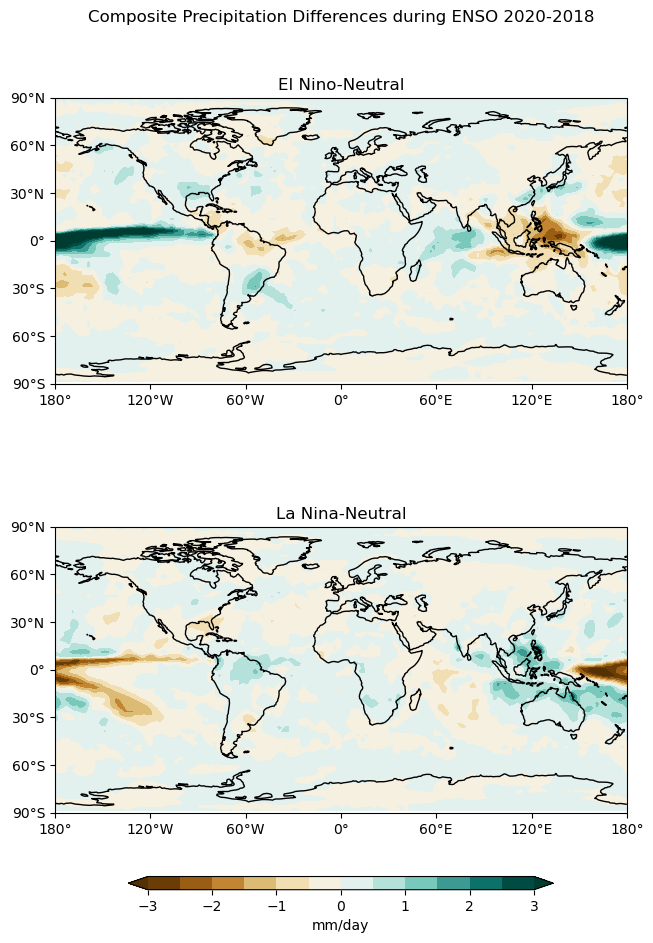

In [ ]:

"""
This code calculates the differences in mean precipitation anomalies between El Niño and Neutral conditions, and La Niña and Neutral conditions.
Variables:
    diff_precip (list): List containing the differences in mean precipitation anomalies between El Niño and Neutral, and La Niña and Neutral conditions.
Plot:
    The code creates a 2x1 subplot grid with the following features:
    - The first subplot shows the difference in mean precipitation anomalies between El Niño and Neutral conditions.
    - The second subplot shows the difference in mean precipitation anomalies between La Niña and Neutral conditions.
    - Both subplots use a contour plot to visualize the differences in precipitation anomalies.
    - The colorbar indicates the precipitation values in mm/day.
    - The subplots are labeled with the ENSO phases (El Niño-Neutral, La Niña-Neutral).
    - Coastlines are drawn on each subplot.
    - A big title at the top of the plot indicates the analysis being performed.
"""

labels = ['El Nino-Neutral', 'La Nina-Neutral']
clevs = np.arange(-3, 3.5, 0.5)

# Define the figure and each axis for the 2 rows
fig, axs = plt.subplots(nrows=2, ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5, 11))

# axs is a 2-dimensional array of `GeoAxes`.
# We will flatten it into a 1-D array
axs = axs.flatten()

# Loop over all of the ENSO phases and plot
for i, enso in enumerate(diff_precip):

    # Select the data as a DataArray - important change
    data = enso if isinstance(enso, xr.DataArray) else enso.precip

    # Add the cyclic point
    data, lons = add_cyclic_point(data, coord=data['lon'])

    # Now handle the data correctly, extract latitudes and longitudes
    if isinstance(data, xr.DataArray):
        lats = data['lat'].values  # Extract latitudes for plotting
    elif isinstance(data, np.ma.MaskedArray):
        lats = enso['lat'].values  # Use the latitude from the original enso dataset if data is a MaskedArray
    else:
        raise ValueError("Unsupported data type")

    # Contour plot
    cs = axs[i].contourf(lons, lats, data, clevs,
                         transform=ccrs.PlateCarree(),
                         cmap='BrBG', extend='both')

    # Longitude labels
    axs[i].set_xticks(np.arange(-180, 181, 60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)

    # Latitude labels
    axs[i].set_yticks(np.arange(-90, 91, 30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    axs[i].yaxis.set_major_formatter(lat_formatter)

    # Title each subplot with the name of the season
    axs[i].set_title(labels[i])

    # Draw the coastlines for each subplot
    axs[i].coastlines()

# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.012])

# Draw the colorbar
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='mm/day')

# Add a big title at the top
plt.suptitle('Composite Precipitation Differences during ENSO 2020-2018')


In [ ]:

"""
This code performs a two-sample t-test to compare mean precipitation anomalies between El Niño and Neutral conditions.
Variables:
    elnino_precip_vals (xarray.DataArray): Precipitation values during El Niño periods.
    neutral_precip_vals (xarray.DataArray): Precipitation values during Neutral periods.
    tstat (float): T-statistic value from the t-test.
    pval (float): P-value from the t-test.
    signif (bool): True if the result is statistically significant, False otherwise.
Steps:
1. Select precipitation values during El Niño and Neutral periods from the dataset `ds_anoms`.
2. Perform a two-sample t-test using the `ttest_ind` function from `scipy.stats`.
3. Calculate the t-statistic value and p-value.
4. Set the confidence level and check if the result is statistically significant.
5. Print the t-statistic, p-value, and significance of the result.
"""

p = 0.05 # 95% confidence level, or 5% likelihood that the result arose by chance
from scipy.stats import ttest_ind

elnino_precip_vals=ds_anoms.sel(time=elnino.dropna(dim='time')['time'])
lanina_precip_vals=ds_anoms.sel(time=lanina.dropna(dim='time')['time'])
neutral_precip_vals=ds_anoms.sel(time=neutral.dropna(dim='time')['time'])

tstat, pval = ttest_ind(elnino_precip_vals['precip'].values.flatten(), 
                        neutral_precip_vals['precip'].values.flatten(), 
                        equal_var=False)

# Convert tstat and pval to mean values for formatting
tstat_float = np.mean(tstat)
pval_float = np.mean(pval)

# Check if the result is statistically significant
signif = pval_float < p   # True if the result is statistically significant, False otherwise  
print(f'T-statistic: {tstat_float:.4f} | P-value: {pval_float:.4f} | Statistically Significant: {signif}')

T-statistic: 7.3377 | P-value: 0.0000 | Statistically Significant: True


In [ ]:
plt.contourf(tstat)
# Add a colorbar
plt.colorbar()
plt.title('T-Statistic for El Nino vs Neutral')
plt.show()

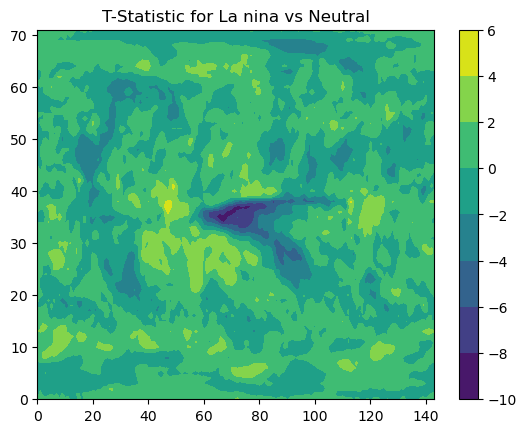

In [ ]:
p = 0.05 # 95% confidence level, or 5% likelihood that the result arose by chance
from scipy.stats import ttest_ind

elnino_precip_vals=ds_anoms.sel(time=elnino.dropna(dim='time')['time'])
lanina_precip_vals=ds_anoms.sel(time=lanina.dropna(dim='time')['time'])
neutral_precip_vals=ds_anoms.sel(time=neutral.dropna(dim='time')['time'])

tstat,pval=ttest_ind(lanina_precip_vals['precip'], 
                neutral_precip_vals['precip'], 
                equal_var = False)


plt.contourf(tstat)
# Add a colorbar
plt.colorbar()
plt.title('T-Statistic for La nina vs Neutral')
plt.show()


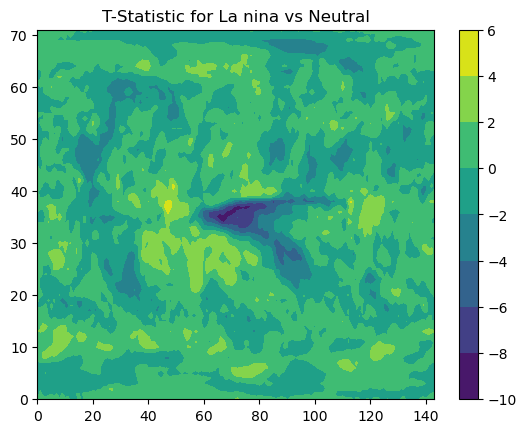

T-statistic: -0.0240 | P-value: 0.4259 | Statistically Significant: [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [67]:
p = 0.05 # 95% confidence level, or 5% likelihood that the result arose by chance
from scipy.stats import ttest_ind

elnino_precip_vals=ds_anoms.sel(time=elnino.dropna(dim='time')['time'])
lanina_precip_vals=ds_anoms.sel(time=lanina.dropna(dim='time')['time'])
neutral_precip_vals=ds_anoms.sel(time=neutral.dropna(dim='time')['time'])

tstat, pval = ttest_ind(lanina_precip_vals['precip'], 
                        neutral_precip_vals['precip'], 
                        equal_var=False)

plt.contourf(tstat)
# Add a colorbar
plt.colorbar()
plt.title('T-Statistic for La nina vs Neutral')
plt.show()

# Check if the result is statistically significant
signif = pval < p   # True if the result is statistically significant, False otherwise
print(f'T-statistic: {tstat.mean():.4f} | P-value: {pval.mean():.4f} | Statistically Significant: {signif}')

In [21]:
# Check for NaN values in the precipitation data
elnino_precip_vals = ds_anoms['precip'].sel(time=lanina.dropna(dim='time')['time']).values.flatten()
lanina_precip_vals = ds_anoms['precip'].sel(time=lanina.dropna(dim='time')['time']).values.flatten()
neutral_precip_vals = ds_anoms['precip'].sel(time=neutral.dropna(dim='time')['time']).values.flatten()

# Check if any of the arrays are empty or contain NaN values
print("La Niña Data: ", lanina_precip_vals[:10])  # Display the first 10 values for La Niña
print("Neutral Data: ", neutral_precip_vals[:10])  # Display the first 10 values for Neutral

# Remove NaN values from the data before performing the t-test
lanina_precip_vals = lanina_precip_vals[~np.isnan(lanina_precip_vals)]
neutral_precip_vals = neutral_precip_vals[~np.isnan(neutral_precip_vals)]

# Check if the arrays still have valid data after removing NaNs
print("La Niña Data after NaN removal: ", lanina_precip_vals[:10])
print("Neutral Data after NaN removal: ", neutral_precip_vals[:10])

# Perform t-test for La Niña vs Neutral again
tstat_lanina, pval_lanina = ttest_ind(
    lanina_precip_vals,
    neutral_precip_vals,
    equal_var=False
)

# Print the results
print("La Niña vs Neutral:")
print("t-statistic:", tstat_lanina)
print("p-value:", pval_lanina)

# Interpret the results
if pval_lanina < 0.05:
    print("The difference between La Niña and Neutral conditions is statistically significant.")
else:
    print("The difference between La Niña and Neutral conditions is not statistically significant.")


La Niña Data:  [-0.02255828 -0.03227841 -0.0354313  -0.02745837 -0.02677862 -0.02926582
 -0.04224695 -0.02704879  0.00539333 -0.02262138]
Neutral Data:  [-0.41724235 -0.49181926 -0.5502917  -0.5725264  -0.58189505 -0.57560813
 -0.5244943  -0.46189126 -0.5026509  -0.5288709 ]
La Niña Data after NaN removal:  [-0.02255828 -0.03227841 -0.0354313  -0.02745837 -0.02677862 -0.02926582
 -0.04224695 -0.02704879  0.00539333 -0.02262138]
Neutral Data after NaN removal:  [-0.41724235 -0.49181926 -0.5502917  -0.5725264  -0.58189505 -0.57560813
 -0.5244943  -0.46189126 -0.5026509  -0.5288709 ]
La Niña vs Neutral:
t-statistic: -0.5934396090709122
p-value: 0.5528870884675607
The difference between La Niña and Neutral conditions is not statistically significant.


In [22]:
mask_diff=diff_precip[0]['precip'].where(pval<p)
mask_diff

<xarray.DataArray 'precip' (lat: 72, lon: 144)> Size: 41kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon      (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8

In [23]:
## Plot our difference between composites and also mark where its significant

Text(0.5, 0.98, 'Composite Precipitation Differences El Nino-Neutral 2000-2018')

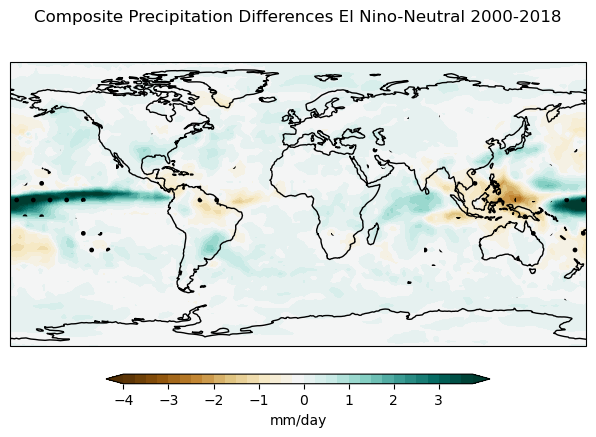

In [24]:
labels=['El Nino-Neutral']
clevs=np.arange(-4,4,0.25)
hatch_levs=[0]

# Define the figure and each axis for the 2 rows and 1 columns
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()})


data=diff_precip[0]['precip']

# Add the cyclic point
data,lons=add_cyclic_point(data,coord=diff_precip[0]['lon'])
mask_data,lons=add_cyclic_point(mask_diff,coord=diff_precip[0]['lon'])

# Contour plot
cs=axs.contourf(lons,diff_precip[0]['lat'],data,clevs,
                    transform = ccrs.PlateCarree(),
                    cmap='BrBG',extend='both')

axs.contourf(lons,diff_precip[0]['lat'],mask_data,[0,1],
              transform = ccrs.PlateCarree(),colors='None',
             hatches=['.',''],extend='both',alpha=0)

# Draw the coastines for each subplot
axs.coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('Composite Precipitation Differences El Nino-Neutral 2000-2018')
#plt.savefig('stats_ttest.png')

Text(-77.09, 38.89, 'Arlington')

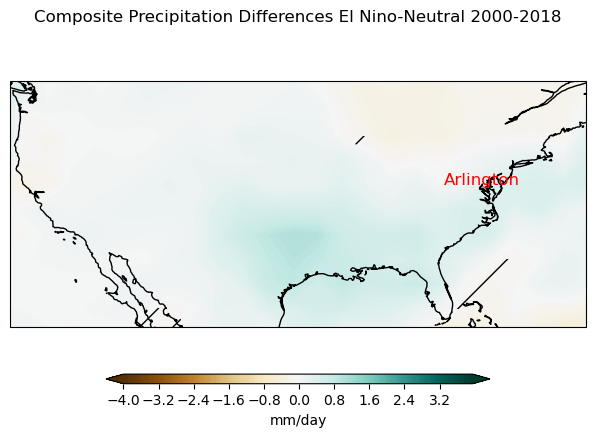

In [25]:
labels=['El Nino-Neutral']
clevs=np.arange(-4,4,0.05)
hatch_levs=[0]

# Define the figure and each axis for the 2 rows and 1 columns
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()})


data=diff_precip[0]['precip']

# Add the cyclic point
data,lons=add_cyclic_point(data,coord=diff_precip[0]['lon'])
mask_data,lons=add_cyclic_point(mask_diff,coord=diff_precip[0]['lon'])

# Contour plot
cs=axs.contourf(lons,diff_precip[0]['lat'],data,clevs,
                    transform = ccrs.PlateCarree(),
                    cmap='BrBG',extend='both')

axs.contourf(lons,diff_precip[0]['lat'],mask_data,[0,1],
              transform = ccrs.PlateCarree(),colors='None',
             hatches=['/',''],extend='both',alpha=0)

# Draw the coastines for each subplot
axs.coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('Composite Precipitation Differences El Nino-Neutral 2000-2018')
#plt.savefig('stats_ttest.png')

# Set extent to zoom into the U.S.
axs.set_extent([-125, -66.5, 24.396308, 49.384358], crs=ccrs.PlateCarree())  # U.S. bounds

# Add Arlington label 
axs.text(-77.09, 38.89, 'Arlington', color='red', fontsize=12, ha='center', transform=ccrs.PlateCarree())

In [26]:
print(type(data))


<class 'numpy.ma.MaskedArray'>


In [27]:
print(diff_precip[i].coords)


Coordinates:
  * lat      (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon      (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8


Data shape (after adding cyclic point): (72, 145)
Longitude shape: (145,)
Latitude shape: (72,)
Data shape (after adding cyclic point): (72, 145)
Longitude shape: (145,)
Latitude shape: (72,)


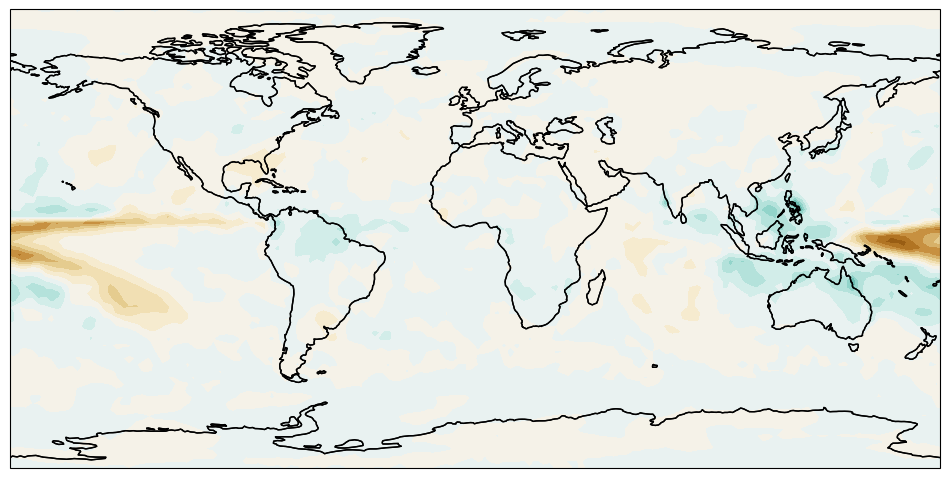

In [ ]:

"""
This code plots the differences in mean precipitation anomalies between El Niño and Neutral conditions for the years 2000 to 2018.
Variables:
    diff_precip (list): List containing the differences in mean precipitation anomalies between El Niño and Neutral conditions.
Plot:
    The code creates a contour plot to visualize the differences in precipitation anomalies between El Niño and Neutral conditions.
    The plot includes the following features:
    - The plot is displayed in Plate Carrée projection.
    - The color scale represents precipitation values in mm/day.
    - The plot shows the differences in mean precipitation anomalies between El Niño and Neutral conditions.
    - Stippling is used to indicate statistically significant differences.
    - Coastlines are drawn on the plot.
    - The plot is zoomed in to show the extent of the U.S.
    - The location of Arlington is labeled on the plot.
"""

# Set levels for contouring
clevs = np.linspace(-5, 5, 21)  # Adjust range as needed

# Begin plotting
fig, ax = plt.subplots(
    subplot_kw={'projection': ccrs.PlateCarree()},
    figsize=(12, 6)
)

for i, enso in enumerate(diff_precip):
    # Access the precipitation data
    data = enso.precip if isinstance(enso, xr.Dataset) else enso

    # Extract coordinates
    lons = diff_precip[i]['lon'].values
    lats = diff_precip[i]['lat'].values

    # Check and drop duplicate longitude if necessary
    if lons[-1] - lons[0] >= 360:
        lons = lons[:-1]
        data = data[..., :-1]

    # Manually add cyclic point to longitude and data
    lons = np.append(lons, lons[0] + 360)
    data = np.hstack([data, data[..., 0:1]])

    # Print shapes to verify alignment
    print(f"Data shape (after adding cyclic point): {data.shape}")
    print(f"Longitude shape: {lons.shape}")
    print(f"Latitude shape: {lats.shape}")

    # Handle masked values (convert to NaN if needed)
    if isinstance(data, np.ma.MaskedArray):
        data = data.filled(np.nan)

    # Create a significance mask
    significance_threshold = 1.0  # Adjust as needed
    mask_data = np.abs(data) > significance_threshold

    # Contour plot
    cs = ax.contourf(
        lons,
        lats,
        data,  # Now guaranteed to have NaN for missing values
        clevs,
        transform=ccrs.PlateCarree(),
        cmap='BrBG',
        extend='both'
    )

    # Overlay stippling for the mask
    ss = ax.contourf(
        lons,
        lats,
        mask_data,
        [0, 1],
        transform=ccrs.PlateCarree(),
        colors=['None'],
        #hatches=['.', ''],
        extend='both',
        alpha=0.0
    )

    # Add coastlines
    ax.coastlines()

plt.show()


In [29]:
print(f"Data min: {np.nanmin(data)}, Data max: {np.nanmax(data)}")
print(f"Data mean: {np.nanmean(data)}, Data shape: {data.shape}")


Data min: -3.6926488876342773, Data max: 2.718050718307495
Data mean: -0.0010050380369648337, Data shape: (72, 145)


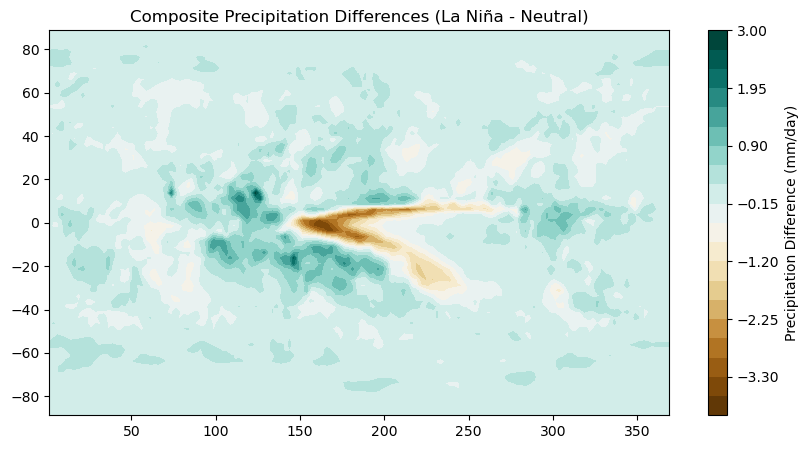

In [70]:
ax.coastlines() # Add coastlines

plt.figure(figsize=(10, 5))
plt.contourf(lons, lats, data, levels=clevs, cmap="BrBG")
plt.colorbar(label="Precipitation Difference (mm/day)")
plt.title("Composite Precipitation Differences (La Niña - Neutral)")
plt.show()


Data min: -3.6926488876342773, max: 2.718050718307495, mean: -0.00029700659797526896


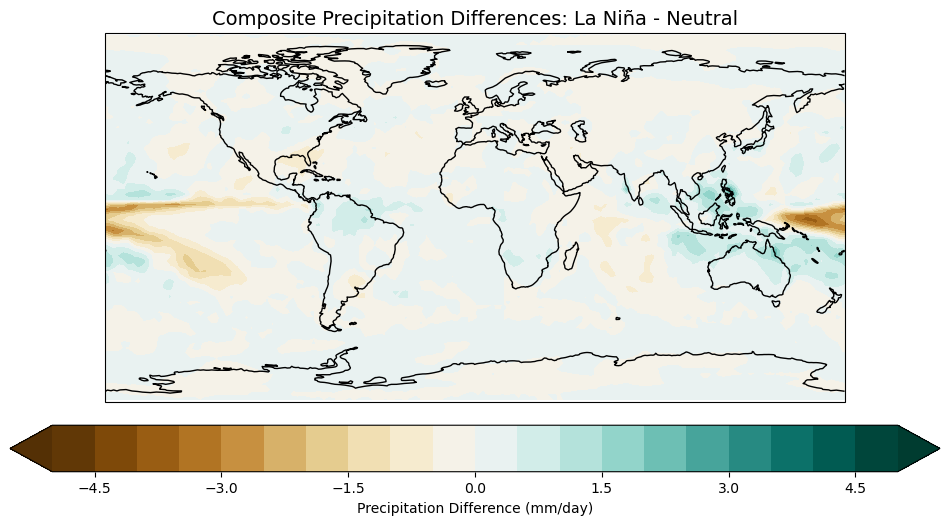

In [72]:

"""
This code plots the differences in mean precipitation anomalies between La Niña and Neutral conditions for the years 2000 to 2018.
Variables:
    diff_precip (list): List containing the differences in mean precipitation anomalies between La Niña and Neutral conditions.
Plot:
    The code creates a contour plot to visualize the differences in precipitation anomalies between La Niña and Neutral conditions.
    The plot includes the following features:
    - The plot is displayed in Plate Carrée projection.
    - The color scale represents precipitation values in mm/day.
    - The plot shows the differences in mean precipitation anomalies between La Niña and Neutral conditions.
    - Coastlines are drawn on the plot.
    - The plot is zoomed in to show the extent of the U.S.
    - The location of Arlington is labeled on the plot.
"""

# Set levels for contouring
clevs = np.linspace(-5, 5, 21)  # Adjust range as needed

# Begin plotting
fig, ax = plt.subplots(
    subplot_kw={'projection': ccrs.PlateCarree()},
    figsize=(12, 6)
)

# Check data ranges and stats
print(f"Data min: {np.nanmin(data)}, max: {np.nanmax(data)}, mean: {np.nanmean(data)}")

# Add cyclic point to data and longitudes for continuous plotting
data, lons = add_cyclic_point(data, coord=lons)

# Create contour plot for precipitation differences
cs = ax.contourf(
    lons,
    lats,
    data,
    levels=clevs,
    transform=ccrs.PlateCarree(),
    cmap='BrBG',
    extend='both'
)

# Add colorbar
cbar = fig.colorbar(cs, orientation='horizontal', pad=0.05)
cbar.set_label("Precipitation Difference (mm/day)")

# Add map features
ax.coastlines()
ax.set_global()
ax.set_title("Composite Precipitation Differences: La Niña - Neutral", fontsize=14)

# Show plot
plt.show()


Data min: -3.6926488876342773, max: 2.718050718307495, mean: -0.0008243931806646287


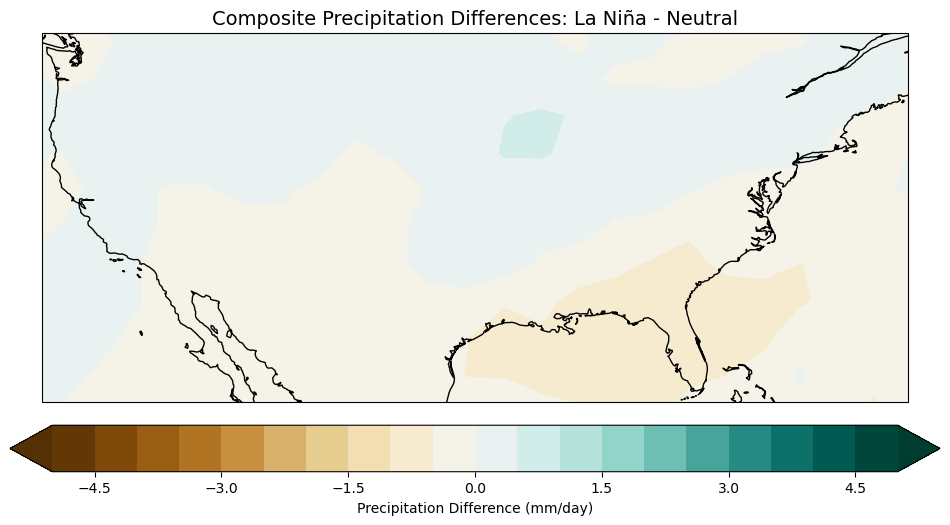

In [32]:
import numpy as np 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

# Set levels for contouring
clevs = np.linspace(-5, 5, 21)  # Adjust range as needed

# Begin plotting
fig, ax = plt.subplots(
    subplot_kw={'projection': ccrs.PlateCarree()},
    figsize=(12, 6)
)

# Check data ranges and stats
print(f"Data min: {np.nanmin(data)}, max: {np.nanmax(data)}, mean: {np.nanmean(data)}")

# Add cyclic point to data and longitudes for continuous plotting
data, lons = add_cyclic_point(data, coord=lons)

# Create contour plot for precipitation differences
cs = ax.contourf(
    lons,
    lats,
    data,
    levels=clevs,
    transform=ccrs.PlateCarree(),
    cmap='BrBG',
    extend='both'
)

# Add colorbar
cbar = fig.colorbar(cs, orientation='horizontal', pad=0.05)
cbar.set_label("Precipitation Difference (mm/day)")

# Add map features
ax.coastlines()

# Set extent to zoom into the U.S.
ax.set_extent([-125, -66.5, 24.396308, 49.384358], crs=ccrs.PlateCarree())  # U.S. bounds

# Title
ax.set_title("Composite Precipitation Differences: La Niña - Neutral", fontsize=14)

# Show plot
plt.show()


Data min: -3.6926488876342773, max: 2.718050718307495, mean: -0.0006462059100158513


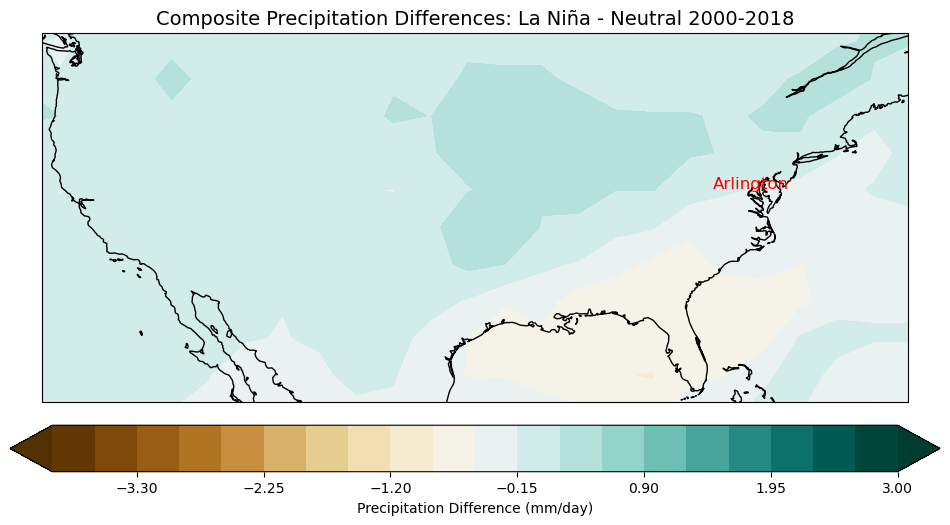

In [33]:
# Set levels for contouring
clevs = np.linspace(-4, 3, 21)  # Adjust range as needed

# Begin plotting
fig, ax = plt.subplots(
    subplot_kw={'projection': ccrs.PlateCarree()},
    figsize=(12, 6)
)

# Check data ranges and stats
print(f"Data min: {np.nanmin(data)}, max: {np.nanmax(data)}, mean: {np.nanmean(data)}")

# Add cyclic point to data and longitudes for continuous plotting
data, lons = add_cyclic_point(data, coord=lons)

# Create contour plot for precipitation differences
cs = ax.contourf(
    lons,
    lats,
    data,
    levels=clevs,
    transform=ccrs.PlateCarree(),
    cmap='BrBG',
    extend='both'
)

# Add colorbar
cbar = fig.colorbar(cs, orientation='horizontal', pad=0.05)
cbar.set_label("Precipitation Difference (mm/day)")

# Add map features
ax.coastlines()

# Set extent to zoom into the U.S.
ax.set_extent([-125, -66.5, 24.396308, 49.384358], crs=ccrs.PlateCarree())  # U.S. bounds

# Title
ax.set_title("Composite Precipitation Differences: La Niña - Neutral 2000-2018", fontsize=14)

# Add Arlington label near the location
ax.text(-77.09, 38.89, 'Arlington', color='red', fontsize=12, ha='center', transform=ccrs.PlateCarree())

# Show plot
plt.show()
